In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants as C
import sympy as sy

In [97]:
x,y,b,c=sy.symbols('x y b c', real=True, positive=True)
# sy.solve(sy.integrate(1/(-b*y**4),y)-x-c,y)[
# sy.root(3*b*x+c**-3,-3).simplify()
p_e = sy.solve(sy.integrate(1/(-(y/c)**3),y)-x-b,y)[0] #t =
p_e2 = p_e.subs({b:sy.solve(p_e.subs({x:0})-y,b)[0]}).simplify()
p_e2.subs({c:sy.root(2*c**2,3)}).simplify()

c*y/sqrt(c**2 + x*y**2)

$y = y_0/\sqrt{ct + 1}$, $c=y_0^2/\lambda^3$

$y(t)=y_1$ @ $t=(y_0^2/y_1^2 - 1)/c$

In [109]:
sy.solve(y/sy.root(c*x+1,2)-b, x)[0].expand()

-1/c + y**2/(b**2*c)

In [117]:
P0/(ck*5474+1)**.5

92.86400831770452

In [120]:
((P0/10)**2-1)/ck

3395700.0

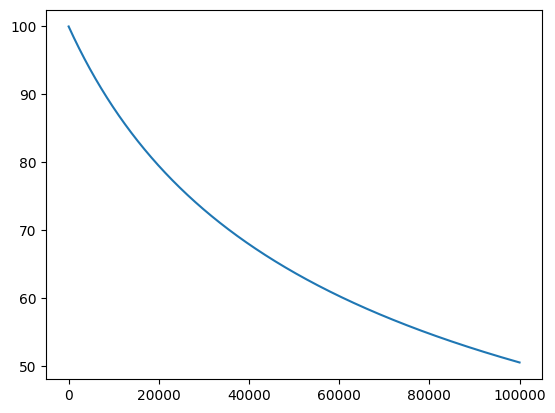

In [116]:
lamda = 700
P0 = 100
ck = P0**2/lamda**3
t_ = np.linspace(1,1e5,2000)
# plt.plot(t_, lamda**1.5*P0/(lamda**3+t_*P0**2)**.5)
plt.plot(t_, P0/(ck*t_+1)**.5)

In [183]:
Eer = 200
ThP = 5.5e3*Eer # in Watts
cv = 20 # N2...
nu_canister = 3743 * 3 # 3 full in cool loop
cool_V = 15.61# m3

hot1_V = 1.995
scalding_V = .315
room_V = 37.5

hot_V = hot1_V + scalding_V + room_V + 2 # pumps and turbines merged, filters ignd
cool_V += 1.07 #pumps and turbines merged


$(1-\sqrt[-3]{k_1 T_d^3+1})=\Delta T_eq/T_d$

In [184]:
Cve = cool_V / AIR_VMOLAR * cv
dTeq = ThP / cv / nu_canister
k1 =  3*C.sigma*91*2/Cve
dTeq, k1

(0.4898031881734794, 2.7128768717500816e-11)

Second approx: Imply that turbines consume just 0.4m3 every time.

Ignoring pumps, that means that we have nets $V_h,V_c$, with $T_h,T_c$ and other args.

$\Delta T_h c_{v,m} \nu_h = \Delta Q_{sm} - \Delta E_{TEG}$

$\Delta T_c c_{v,m} \nu_c = (1-\eta_T)\Delta E_{TEG} - \Delta Q_{HE}$.

$\nu_1=\nu_h V_t/V_h; \nu_2=\nu_c V_t/V_c$, $V_t=0.4$ m3;

$\tilde{C} = \dfrac{C_1C_2}{C_1+C_2} = \dfrac{\nu_1\nu_2}{\nu_1+\nu_2} = V_t \dfrac{\nu_c\nu_h}{V_c\nu_h + V_h\nu_c}$

$\Delta E_{TEG} = (T_1-T_2)\tilde{C}$

$(T_h - T'_h)c_{v,m}\nu_h = k_Q\eta_rP_{sm} - (T_h-T_c)\tilde{C}$,

$(T_c-T'_c)c_{v,m}\nu_c = (1-\eta_T)(T_h-T_c)\tilde{C} - c_{v,m}\nu_c\left(
    T_d(1-\sqrt[-3]{k_1T_d^3+1})-k_2
\right)$

Stationary sol'n gets deltas = 0, i.e.,
($P_\Theta = k_Q\eta_rP_{sm}$ -- `ThP`)

$T_h - T_c = P_\Theta / \tilde{C}$,

$(1-\eta_T)(T_h-T_c)\tilde{C} = c_{v,m}\nu_c \Delta T_{rad}$

In [185]:
_vc, _vh,_vt,_nuh,_nuc =sy.symbols('V_c V_h V_t \\nu_h \\nu_c')
_nu1,_nu2 = _vt * _nuh/_vh, _vt * _nuc/_vc
((_nu1*_nu2/(_nu1+_nu2))/_nu1).simplify()

V_h*\nu_c/(V_c*\nu_h + V_h*\nu_c)

In [218]:
eta_C = 0.4 *cv* (nu_canister / (cool_V+hot_V))
nu1,nu2 = 0.4*nu_canister/hot_V, 0.4*nu_canister/cool_V
eta_C
Eer = 113
ThP = 5.5e3*Eer
ThP/eta_C, ThP/eta_C*nu1*cv*.65

(404.6613122272687, 565139.864864865)

More precise mathmodel

In [ ]:
Vc1 = 13.37+1.47+0.77 + 3*.2 # this is wat is cooled/ cool turb out
Vc2 = .67 #cool turbine inp
Vh2 = 1.995 + .2 +.7 + 2 # filters / hot turb out
Vh1 = .315 + .4 + .2 # hot turb in
Vh0 = 37.5 # room

Stationary:

$\dot\nu_{c1} = \Delta\nu_{T2} - \Delta\nu_{HP1} = 0$

$\dot\nu_{c2} = \Delta\nu_{HP1} - \Delta\nu_{T2} = 0$

$\dot\nu_{h2} = \Delta\nu_{T1} - \Delta\nu_{PO1} = 0$

$\dot\nu_{h0} = \Delta\nu_{PO1} - \Delta\nu_{PI1} = 0$

$\dot\nu_{h1} = \Delta\nu_{PI1} - \Delta\nu_{T1} = 0$

This means, that $\Delta\nu_{T2} = \Delta\nu_{HP1}$, and
$\Delta\nu_{PI1} = \Delta\nu_{PO1} = \Delta\nu_{T1}$.

First let's assume that it's purely power rating-limited. This means, that

$\Delta\nu_{PI1} = N_{45}/N_{s,h2,h0} = \Delta\nu_{PO1} = N_{30}/N_{s,h0,h1} = \Delta\nu_{T1}$;

$\Delta\nu_{HP1} = N_{45}/N_{s,c1,c2} = \Delta\nu_{T2}$.

$N_{s,h2,h0} = 3/2 N_{s,h0,h1}$;

$T_{h0} \log\dfrac{1+c_1T_{h0}^{2/3}/p_{h0}}{1+c_1T_{h2}^{2/3}/p_{h2}} = \dfrac{3}{2} T_{h1} \log\dfrac{1+c_1T_{h1}^{2/3}/p_{h1}}{1+c_1T_{h0}^{2/3}/p_{h0}} = -\dfrac{5N_{s,h}}{2R}$

$T_{c2} \log\dfrac{1+c_1T_{c2}^{2/3}/p_{c2}}{1+c_1T_{c1}^{2/3}/p_{c1}} = - \dfrac{5N_{s,c}}{2R}$

$\Delta\nu_{T1} = \dfrac{1}{RT_{h2}} P_{h2} V_i = N_{45}/N_{s,h}$,

$\Delta\nu_{T2} = \dfrac{1}{RT_{c2}} P_{c2} V_i = N_{45}/N_{s,c}$,

In [232]:
c1p = (20*.028)**(2/3)*8.314

5.648529113255366

In [219]:
dTeq = ThP*(1-.65) / cv / nu_canister

In [220]:
[el.subs({c:dTeq,b:k1}).evalf() for el in sy.solve(x*(1-sy.root((b*x**3+1),-3))-c,x)]

[0.484292902306527 - 572.08038658823*I,
 0.484292902306528 + 572.08038658823*I,
 0.484292902305594 + 0.279606637513811*I,
 0.484292902307461 - 0.279606637513811*I,
 -571.596776979974 - 6.12452084887657e-15*I,
 572.565362784587 + 6.12452084887657e-15*I]

In [221]:
import astropy.units as u
from astropy.units import Quantity as uQ

In [225]:
(u.Pa * u.m**3).compose()[0]

Unit("J")

In [131]:
V1 = 0.07 #m3
V = V1*10 #m3
AIR_PCRIT = 3771e3 # Pa
AIR_TCRIT = 132.65 # K, 
R_IDEAL_GAS = 8.31
AIR_VMOLAR = R_IDEAL_GAS * AIR_TCRIT / AIR_PCRIT
qSol = 200 # W/m2
S=2
F=0.04
cv = 20 #J/mol/K
# res = []
nu = 4e3 #mol
T0 = 5000.
Vm = V/nu
eta = min(1, AIR_VMOLAR/Vm)
dQsol = eta*S * qSol*F
dQr0 = eta*S * C.sigma*(T0-3.15)**4
C1V = cv*nu # total heat capacity of gas
dQsol/C1V, dQr0/C1V, dQr0/dQsol, eta

(0.0002, 883.7654020661274, 4418827.010330637, 1)

In [51]:
def eval_cooling(nu: float, T0: float, N:int=1000):
    Vm = V/nu
    eta = min(1, AIR_VMOLAR/Vm)
    dQsol = eta*S * qSol*F
    dQr0 = eta*S * C.sigma*(T0-3.15)**4
    C1V = cv*nu # total heat capacity of gas

    T_semilin = []
    T_proper = []
    Ts = T0
    for i in range(N):
        dQrs = eta*S * C.sigma*(Ts-3.15)**4 # for only-radiat-iter
        T_semilin.append(Ts+i*dQsol/C1V)
        Ts -= dQrs/C1V
    Tp = T0
    for i in range(N):
        dQrp = eta*S * C.sigma*(Tp-3.15)**4 # for full-iter
        T_proper.append(Tp)
        Tp += (dQsol - dQrp)/C1V

    nu_eta = V/AIR_VMOLAR # critical mnt
    Cve = max(nu, nu_eta)*cv
    b_ = C.sigma*S/Cve
    c_ = 1/(T0-3.15)**3
    T_lin = [(3*b_*i+c_)**(-1/3.) + (i)*(dQsol)/C1V + 3.15for i in range(N)]
    return T_lin, T_semilin, T_proper

In [52]:
b__ = C.sigma*S/(V/AIR_VMOLAR*cv)
c__ = 1/(1e3-3.15)**3

In [53]:
(1/b__)**.25

806.136600185627

230.33537265887787

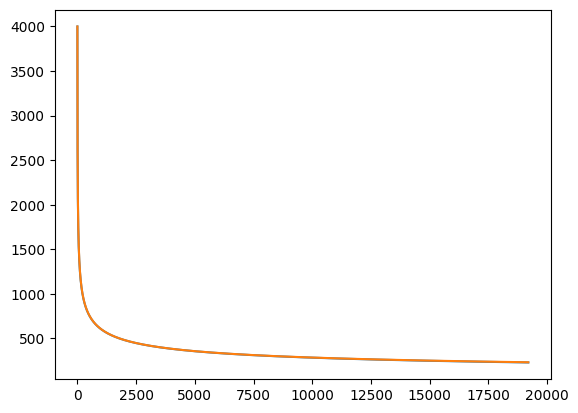

In [57]:
Ns_ = [*range(1,192,1)]
rr = eval_cooling(3743.5, 4000, 19200)
plt.plot(rr[2])
plt.plot(rr[0])
rr[2][-1]
# T0 = 400
# refs = [eval_cooling(3743,   T0, N) for N in Ns_]
# rets = [abs(x[0][-1]-x[2][-1])/T0 for x in refs]
# plt.plot(Ns_, rets)

Text(0, 0.5, '$T_50$')

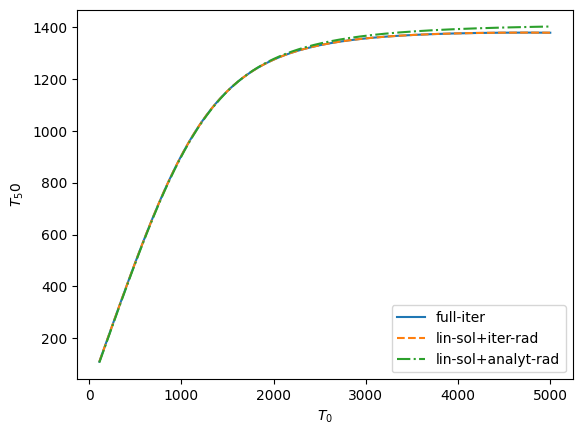

In [345]:
N=50
nus_ = np.linspace(110,5e3,1000)
refs = [eval_cooling(1e3, nu, N) for nu in nus_]
rets = [x[0][-1]-x[2][-1] for x in refs]
plt.plot(nus_, [x[2][-1] for x in refs], label='full-iter')
plt.plot(nus_, [x[1][-1] for x in refs], '--', label='lin-sol+iter-rad')
plt.plot(nus_, [x[0][-1] for x in refs], '-.', label='lin-sol+analyt-rad')
plt.xlabel('$T_0$')
plt.legend()
plt.ylabel(f'$T_{N}$')

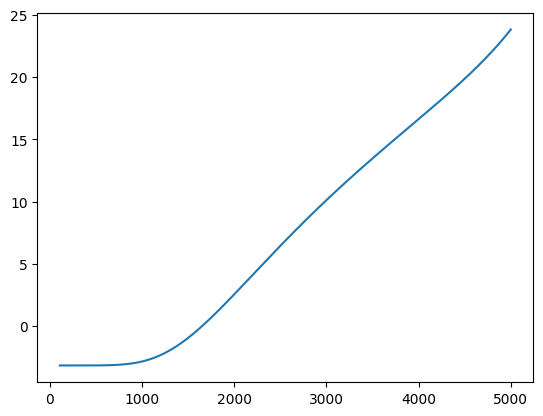

In [326]:
plt.plot(nus_, rets)